# Netflix Movies & TV Shows – Exploratory Data Analysis (EDA)
[https://www.kaggle.com/datasets/shivamb/netflix-shows]

About this Dataset:

Netflix is one of the most widely used platforms for streaming movies and TV shows. As of mid-2021, it had over 301.6 million subscribers worldwide and offered a library of more than 9,000 titles. This tabular dataset includes detailed information about the content available on Netflix, such as the cast, directors, ratings, release year, duration, and more.

##Library Setup

In [123]:
# Import library
import numpy as np
import pandas as pd

##Dataset Loaded

In [124]:
# Import dataset
from urllib.request import urlretrieve
URL = "https://raw.githubusercontent.com/Srushti2331/DS-ML-Project/refs/heads/main/netflix_titles.csv"
netflix_df = pd.read_csv(URL)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

(1) Initial Data Exploration

* Reviewed the structure of the dataset, including the total number of rows and columns.
* Inspected data types and explored the value ranges across different columns.
* Used basic exploratory functions like .info(), .shape, .head(), and .describ()
to understand the data distribution.


In [125]:
# Returns first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [126]:
# Returns the dimensions of the DataFrame as a tuple
netflix_df.shape

(8807, 12)

In [127]:
# Provides a concise summary of a DataFrame
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [128]:
# Provieds a descriptive statistics for the numeric columns of a DataFrame
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [129]:
# Returns all the column names of DataFrame
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [130]:
# Returns how many titles were released per year (1947-2018)
netflix_df["release_year"].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


In [131]:
# Getting the count of how many entries are Movies vs TV Shows in the dataset
netflix_df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [132]:
# Returns the number of unique values in the column of a DataFrame
netflix_df["cast"].nunique()

7692

(2) Missing Value Treatment

* Identified null or blank entries in the dataset.
* Applied appropriate techniques to handle missing values—either by filling them in or removing them based on the context.

In [133]:
# Returns a summary of the missing values in each column of DataFrame
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [134]:
# Drops any columns that contain missing values
droprw = netflix_df.dropna(axis=1)
droprw

,show_id,type,title,release_year,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2007,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,2018,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [135]:
# Replace Null values with TV-MA
netflix_df['rating'] = netflix_df['rating'].replace(np.nan, 'TV-MA')

In [136]:
# Replace Null values with United States
netflix_df['country'] = netflix_df['country'].replace(np.nan, 'United States')

In [137]:
# Validate result
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,10
release_year,0
rating,0
duration,3


## Exploratory Analysis and Visualization

After cleaning and preparing the dataset, I conducted an exploratory data
analysis (EDA) to uncover patterns, trends, and relationships across different
columns.

Let's start with importing`matplotlib.pyplot` and `seaborn`.

In [138]:
# Import libaray
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
plt.rc("font",size=12)
plt.figure(figsize=(8,4))
plt.figure(facecolor="#00000000")

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

**(1) Number of Movies/TV Shows Released Per Year on Netflix , visualized by "HORIZONTAL BAR GRAPH"**

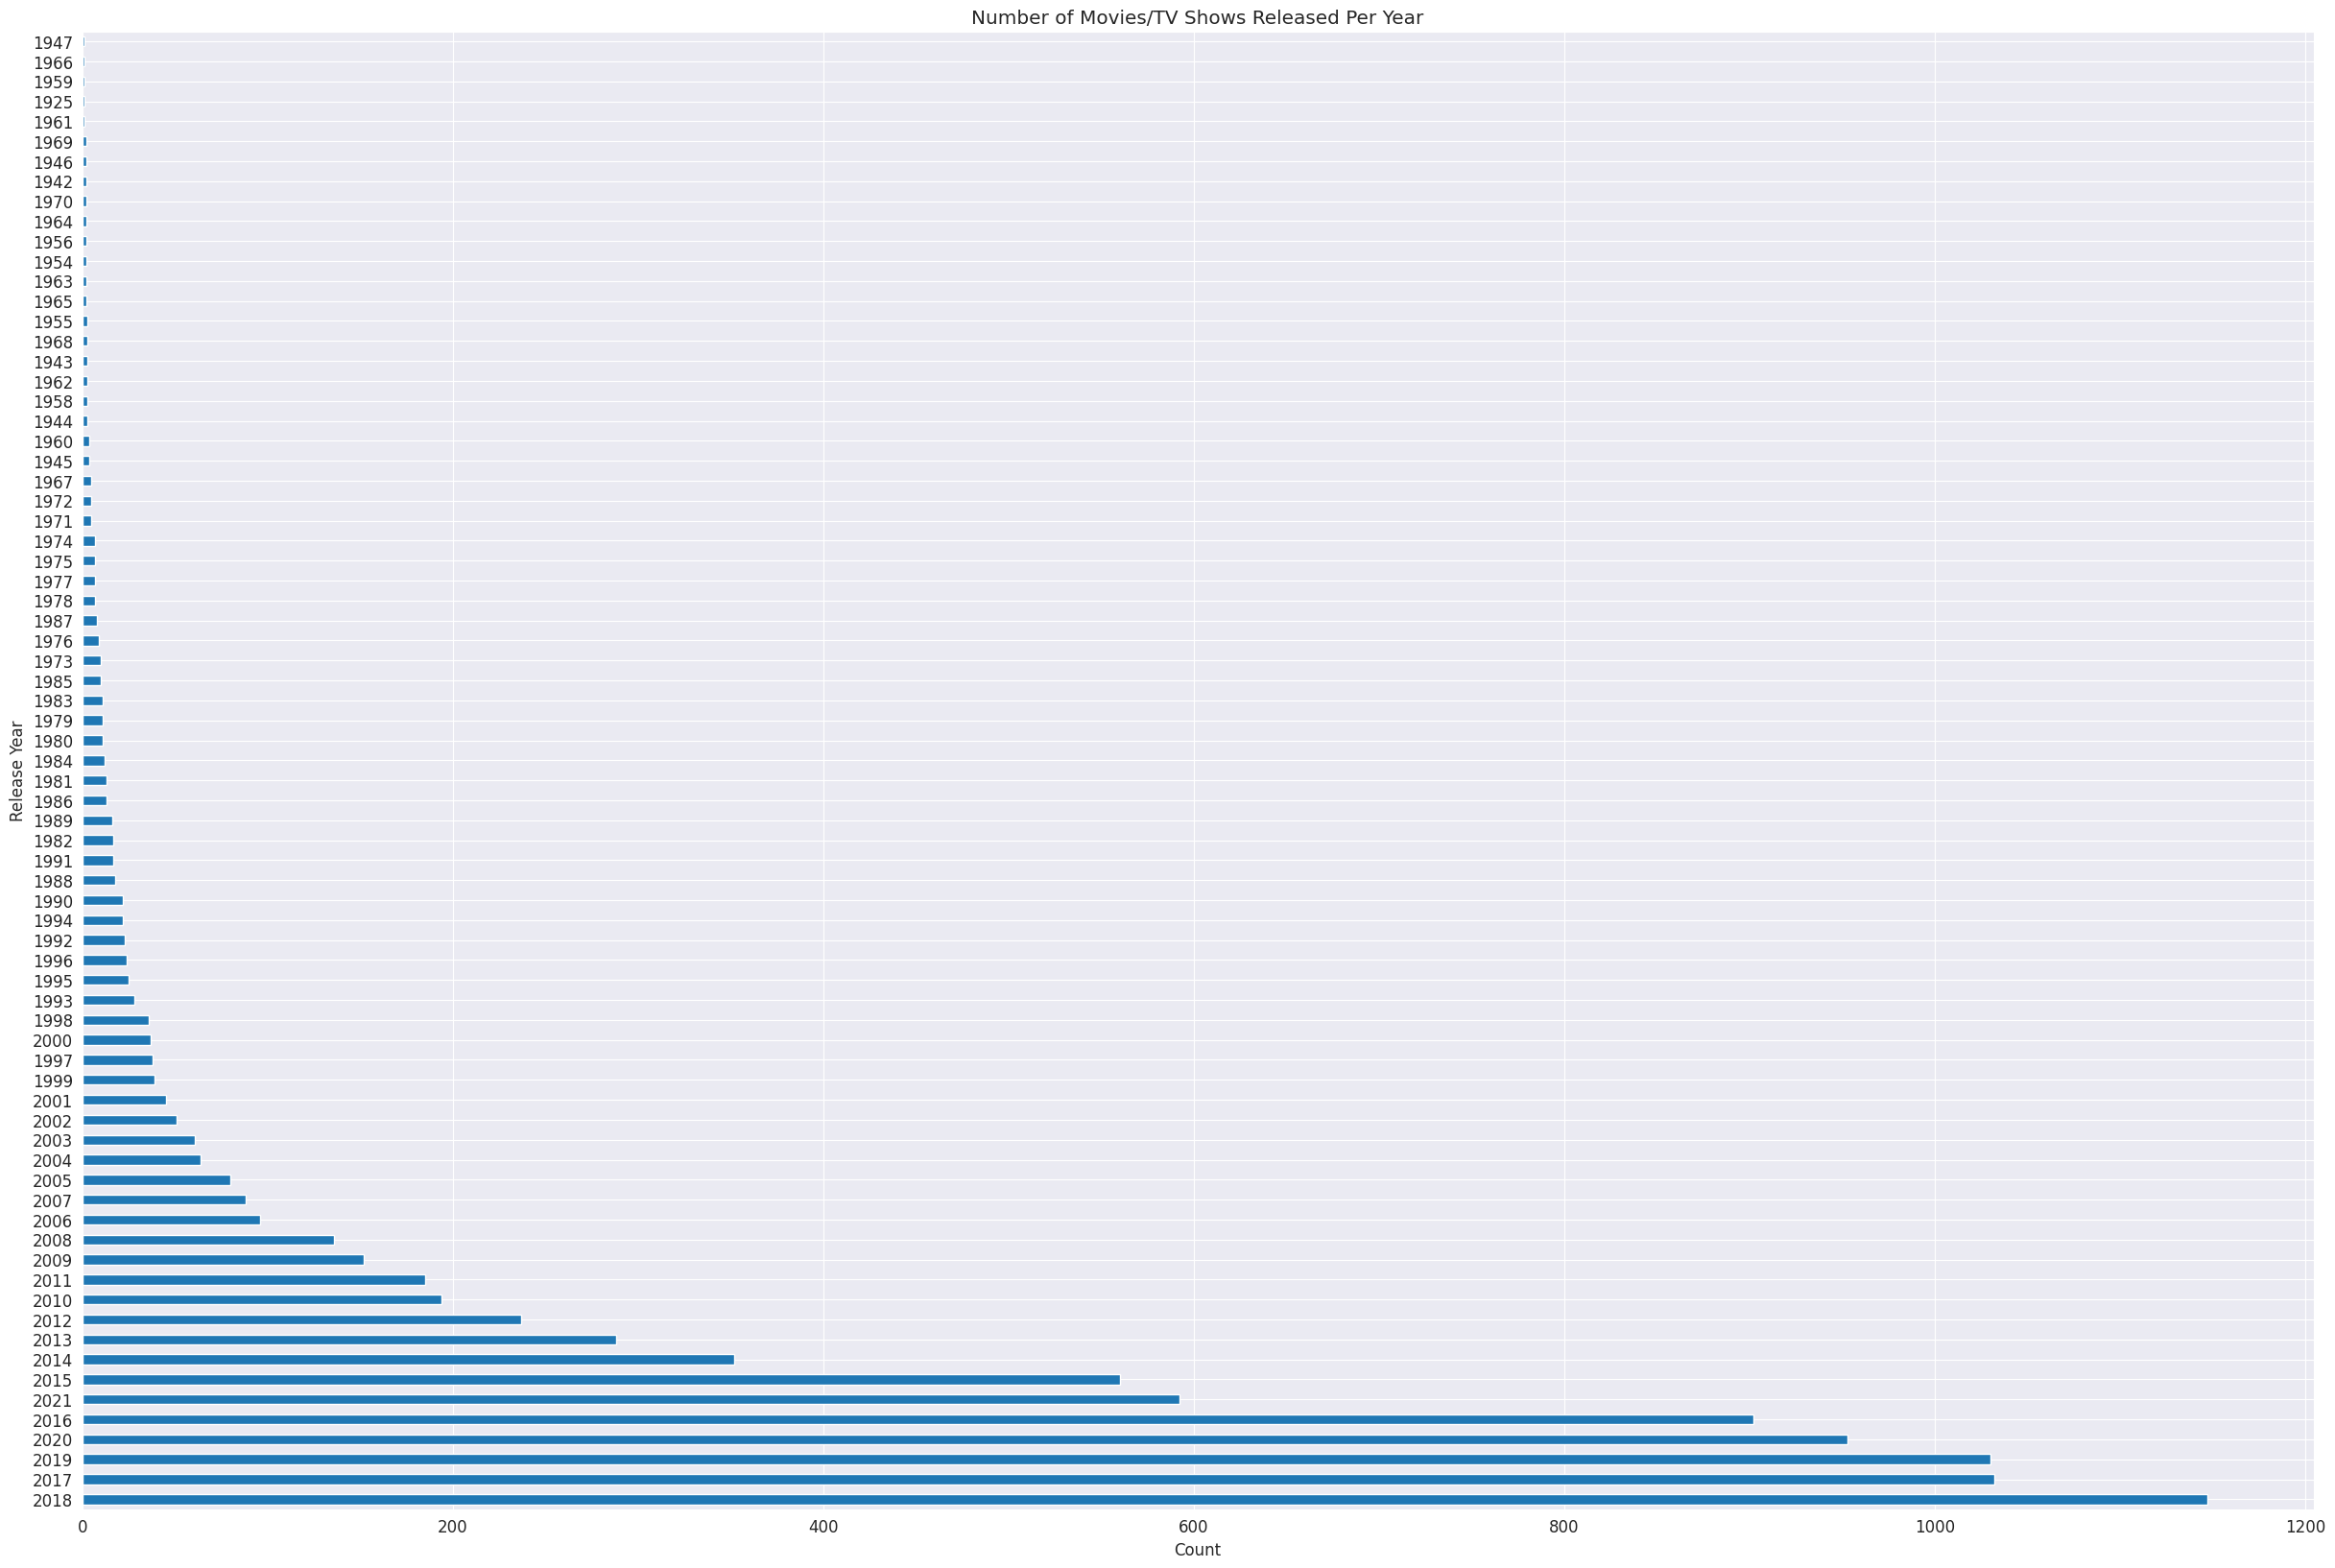

In [139]:
# Plot Horizontal bar graph
netflix_df["release_year"].value_counts().plot.barh(figsize=(30,20), color="#1f77b4")
plt.title('Number of Movies/TV Shows Released Per Year')
plt.xlabel("Count")
plt.ylabel("Release Year")
plt.show()

**(2) Compare TV SHOWS VS MOVIES on Netflix, visualised by "BAR GRAPH"**

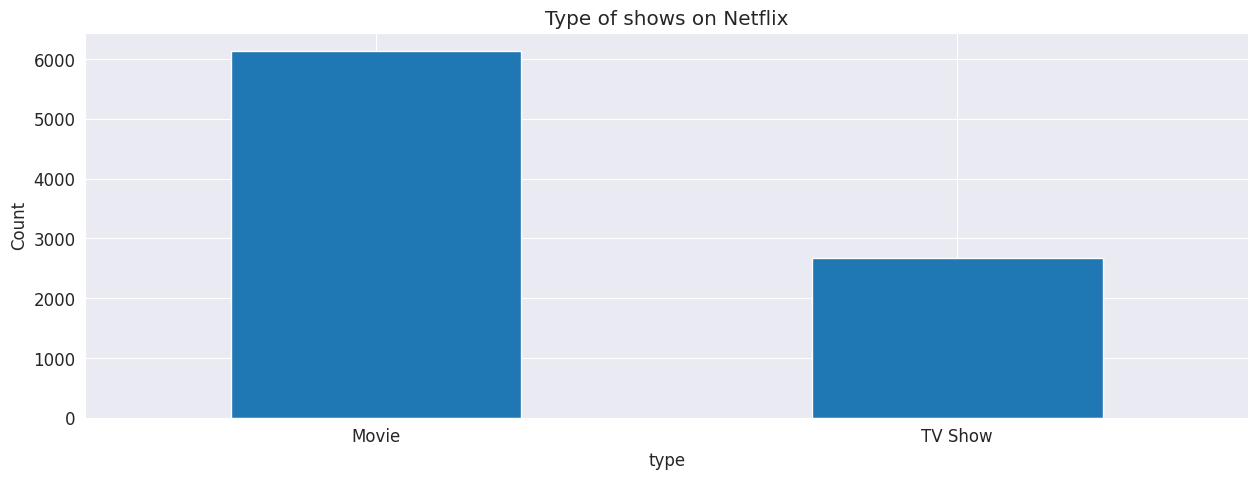

In [140]:
# Plot Bar grph
netflix_df["type"].value_counts().plot.bar(figsize=(15,5), color="#1f77b4")
plt.title('Type of shows on Netflix')
plt.ylabel("Count")
plt.xticks(rotation=360)
plt.show()

**(3) Compare TV SHOWS VS MOVIES on Netflix, visualised by "PIE GRAPH"**

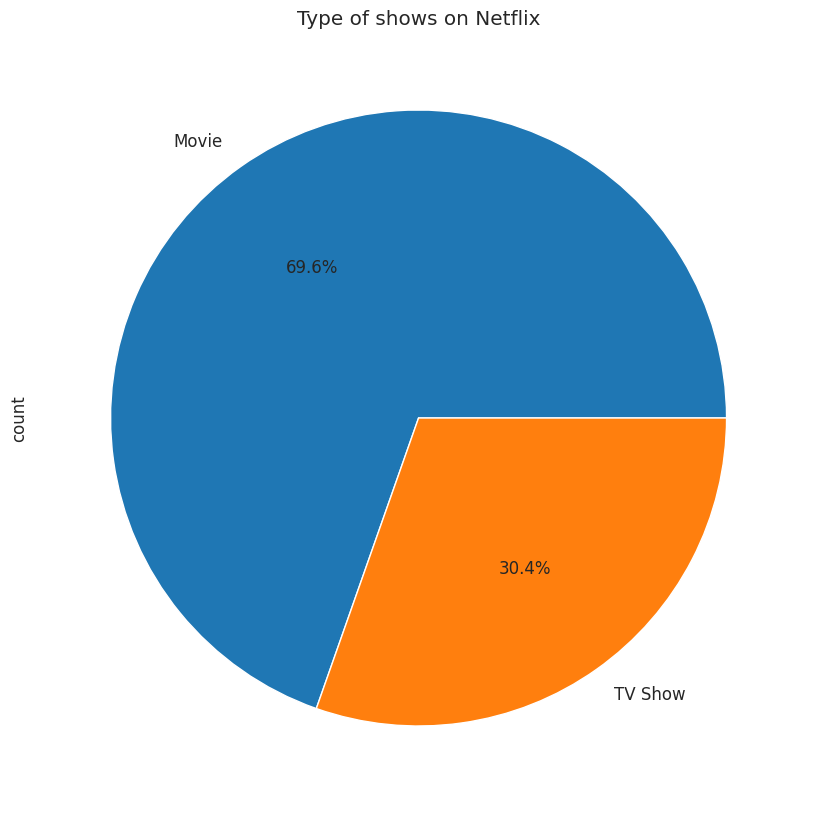

In [141]:
# Plot Pie graph
netflix_df['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,10))
plt.title('Type of shows on Netflix')
plt.show()

**(4) The Netflix Rating Distribution, visualised by "BAR GRAPH"**

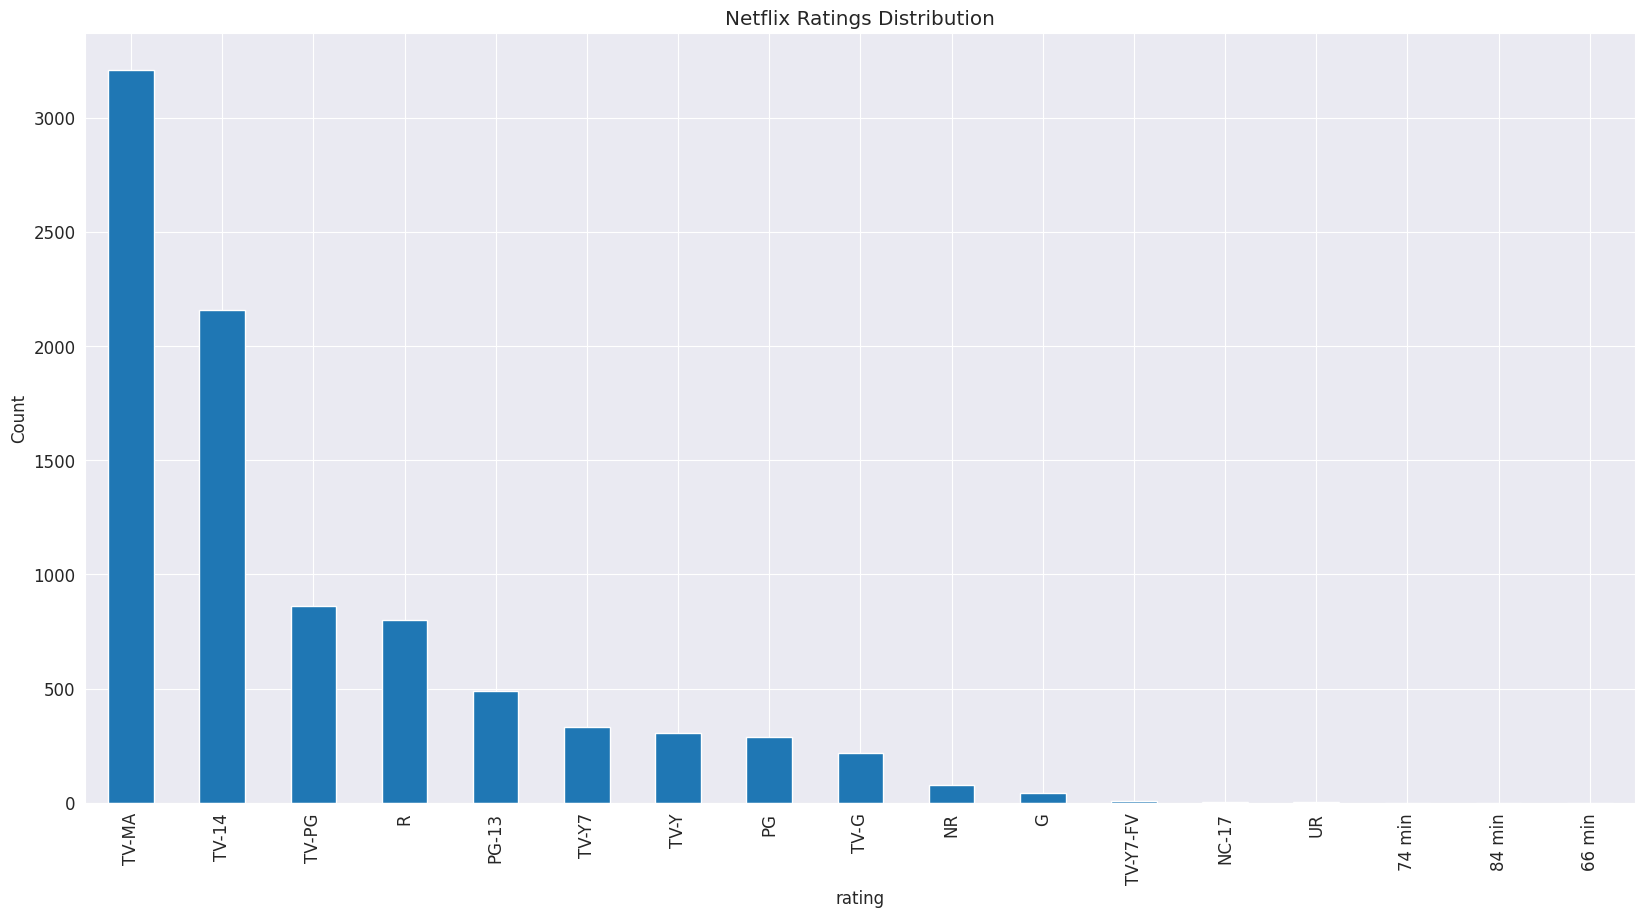

In [142]:
# Rating distribution
netflix_df["rating"].value_counts().plot.bar(figsize=(20,10), color="#1f77b4")
plt.title('Netflix Ratings Distribution')
plt.ylabel("Count")
plt.show()

**(5) The ratings seperated by type of release (Movies/TV Shows), visualised by a "COUNT PLOT"**

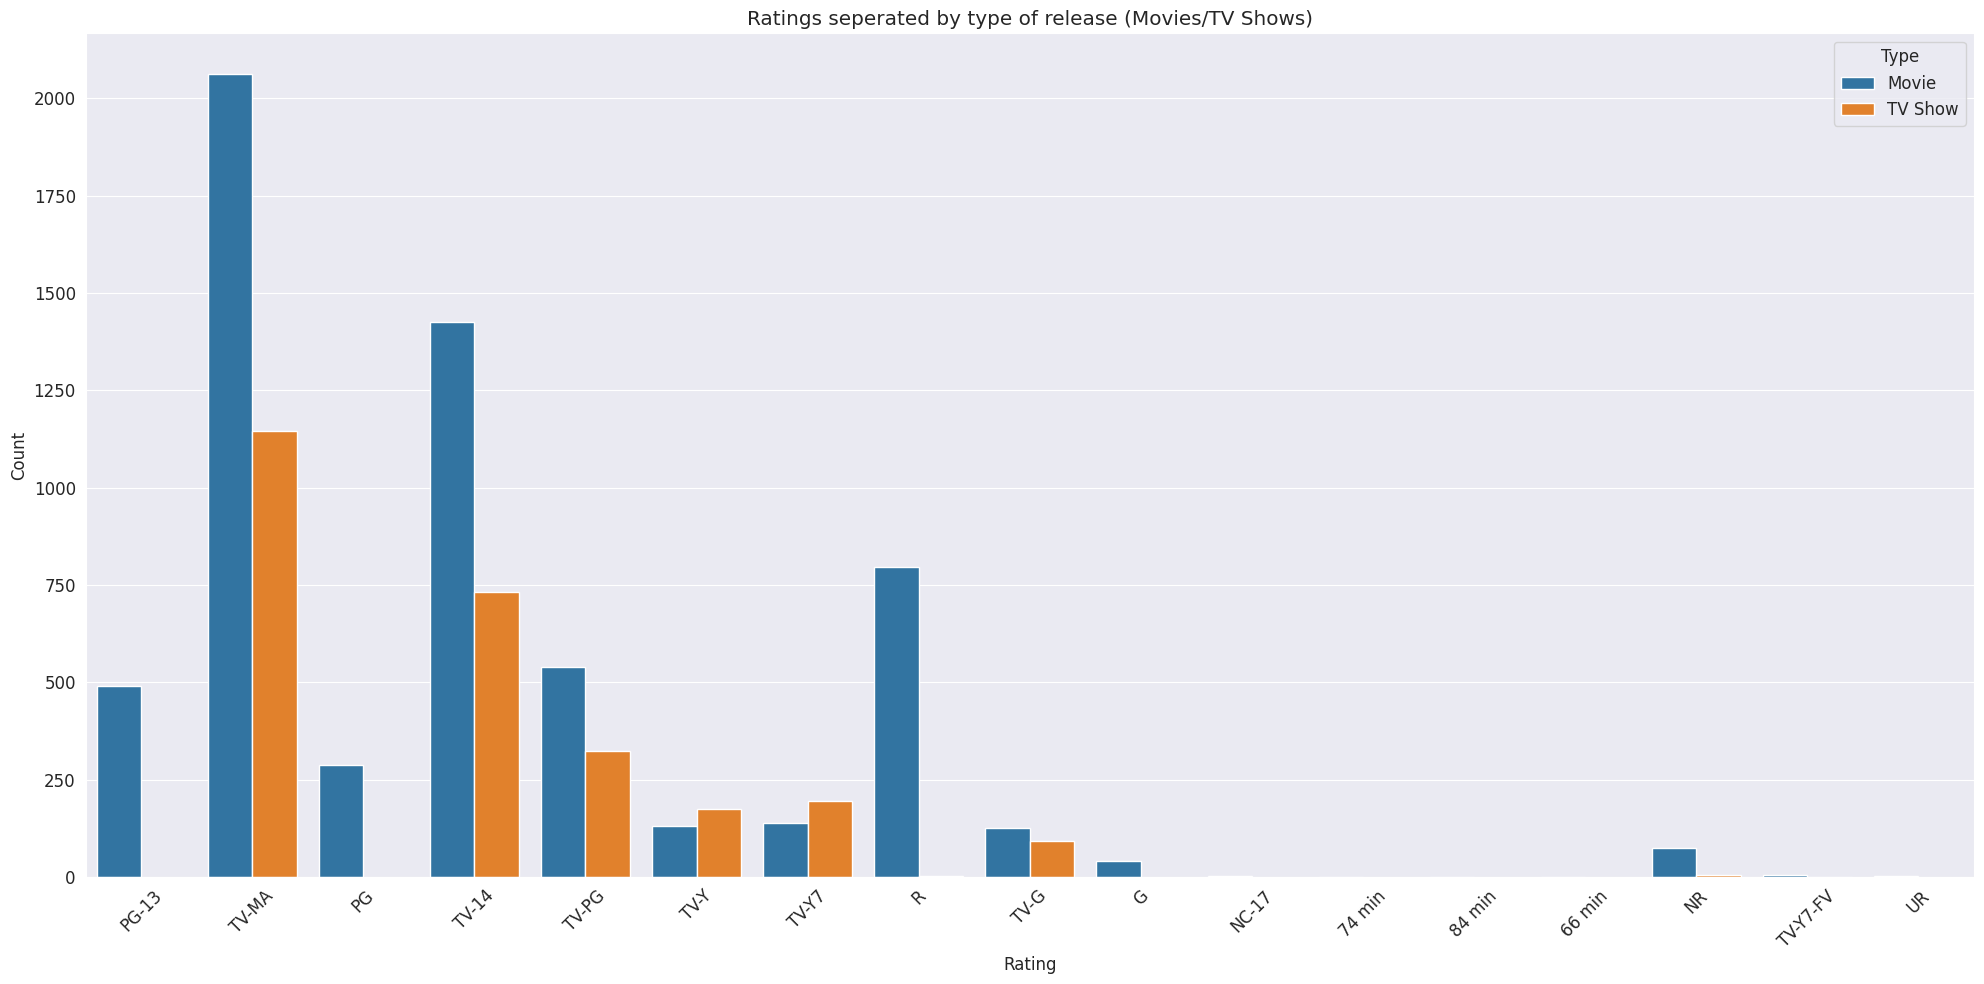

In [143]:
# Plot Count plot
plt.figure(figsize=(20,10))
sns.countplot(x='rating', data=netflix_df, hue='type')

plt.title("Ratings seperated by type of release (Movies/TV Shows)")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


**(6) The Top 5 countries with Highest Movies/TV Shows, visualised by a "PIE GRAPH"**

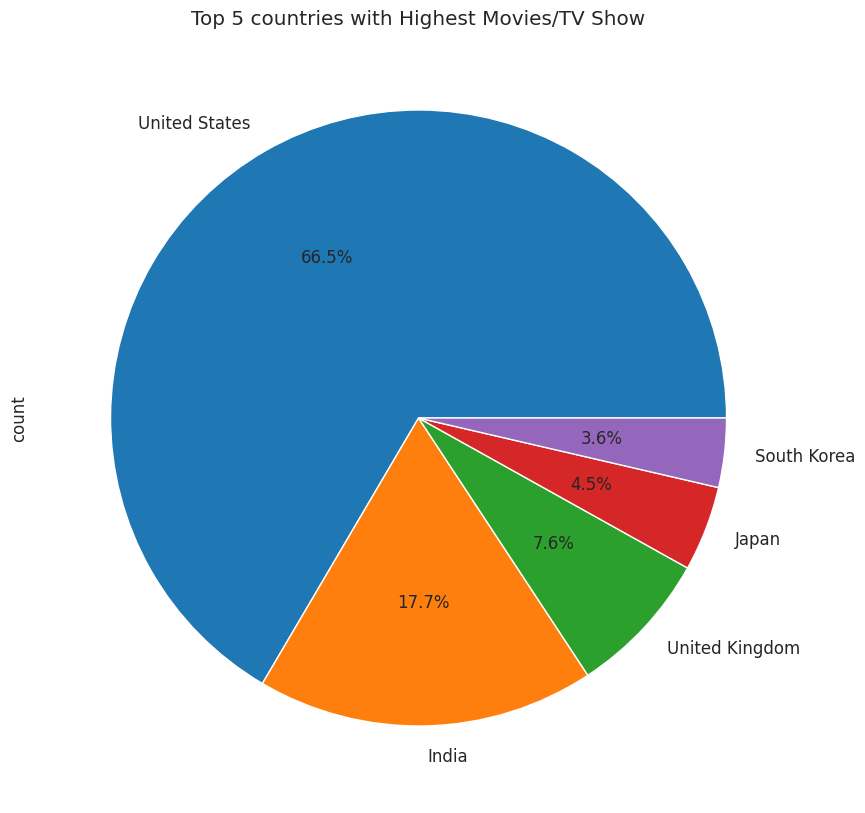

In [144]:
# Plot Pie graph
netflix_df["country"].value_counts().nlargest(n=5).plot.pie(autopct='%1.1f%%',figsize=(15,10))
plt.title("Top 5 countries with Highest Movies/TV Show")
plt.show()

**(7) The Top 5 countries with Highest Movies/TV Shows, visualized by "HORIZONTAL BAR GRAPH"**

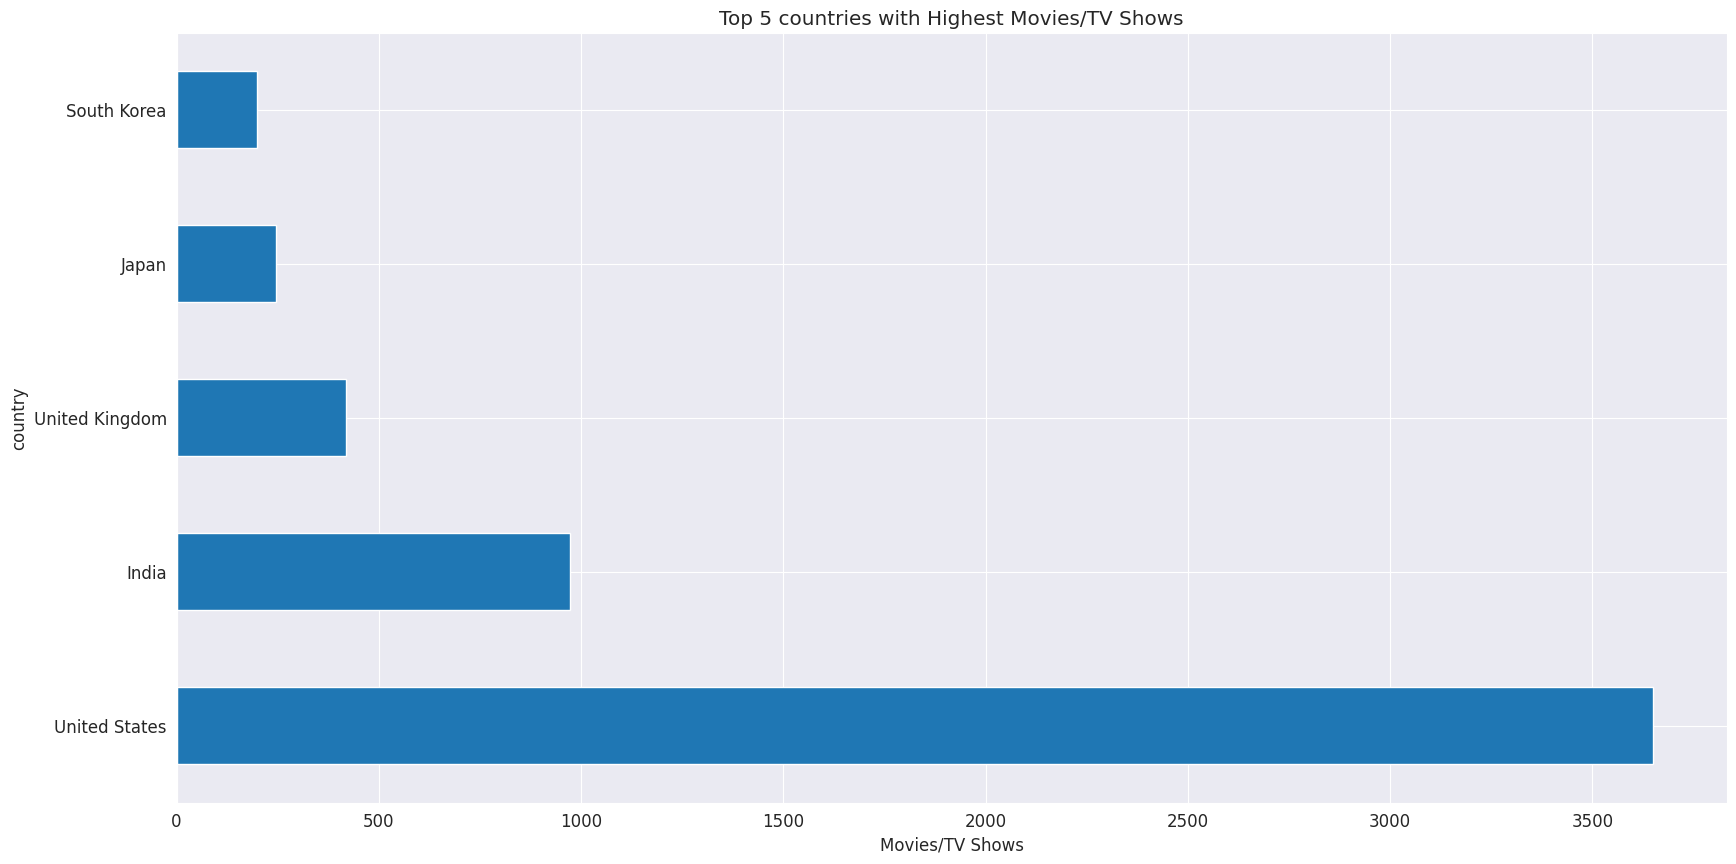

In [145]:
# Plot Bar graph
netflix_df["country"].value_counts().nlargest(n=5).plot.barh(figsize=(20,10), color="#1f77b4")
plt.title('Top 5 countries with Highest Movies/TV Shows')
plt.xlabel("Movies/TV Shows")
plt.show()

**(8) Top 5 countries with the largest Netflix content distribution, separated by type of release (movies/TV shows), visualized by a "COUNT PLOT"**

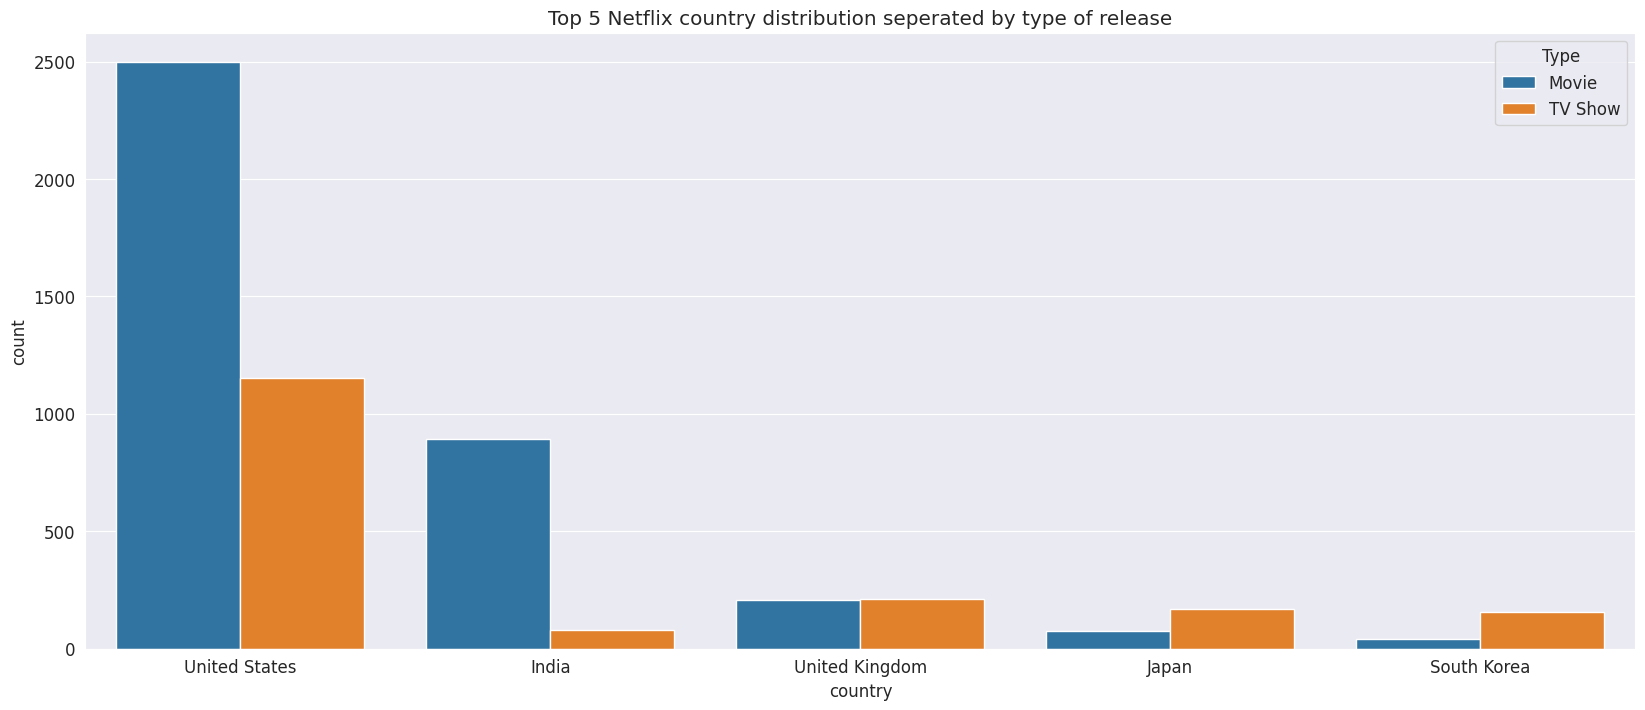

In [146]:
# Plot Count plot
plt.figure(figsize = (20,8))
sns.countplot(x='country', data=netflix_df, hue='type', order=netflix_df.country.value_counts().iloc[:5].index)
plt.title('Top 5 Netflix country distribution seperated by type of release')
plt.legend(title="Type")
plt.show()

**(9) The Top 5 most frequent cast members in a Netflix dataset, visualized by "BAR GRAPH"**

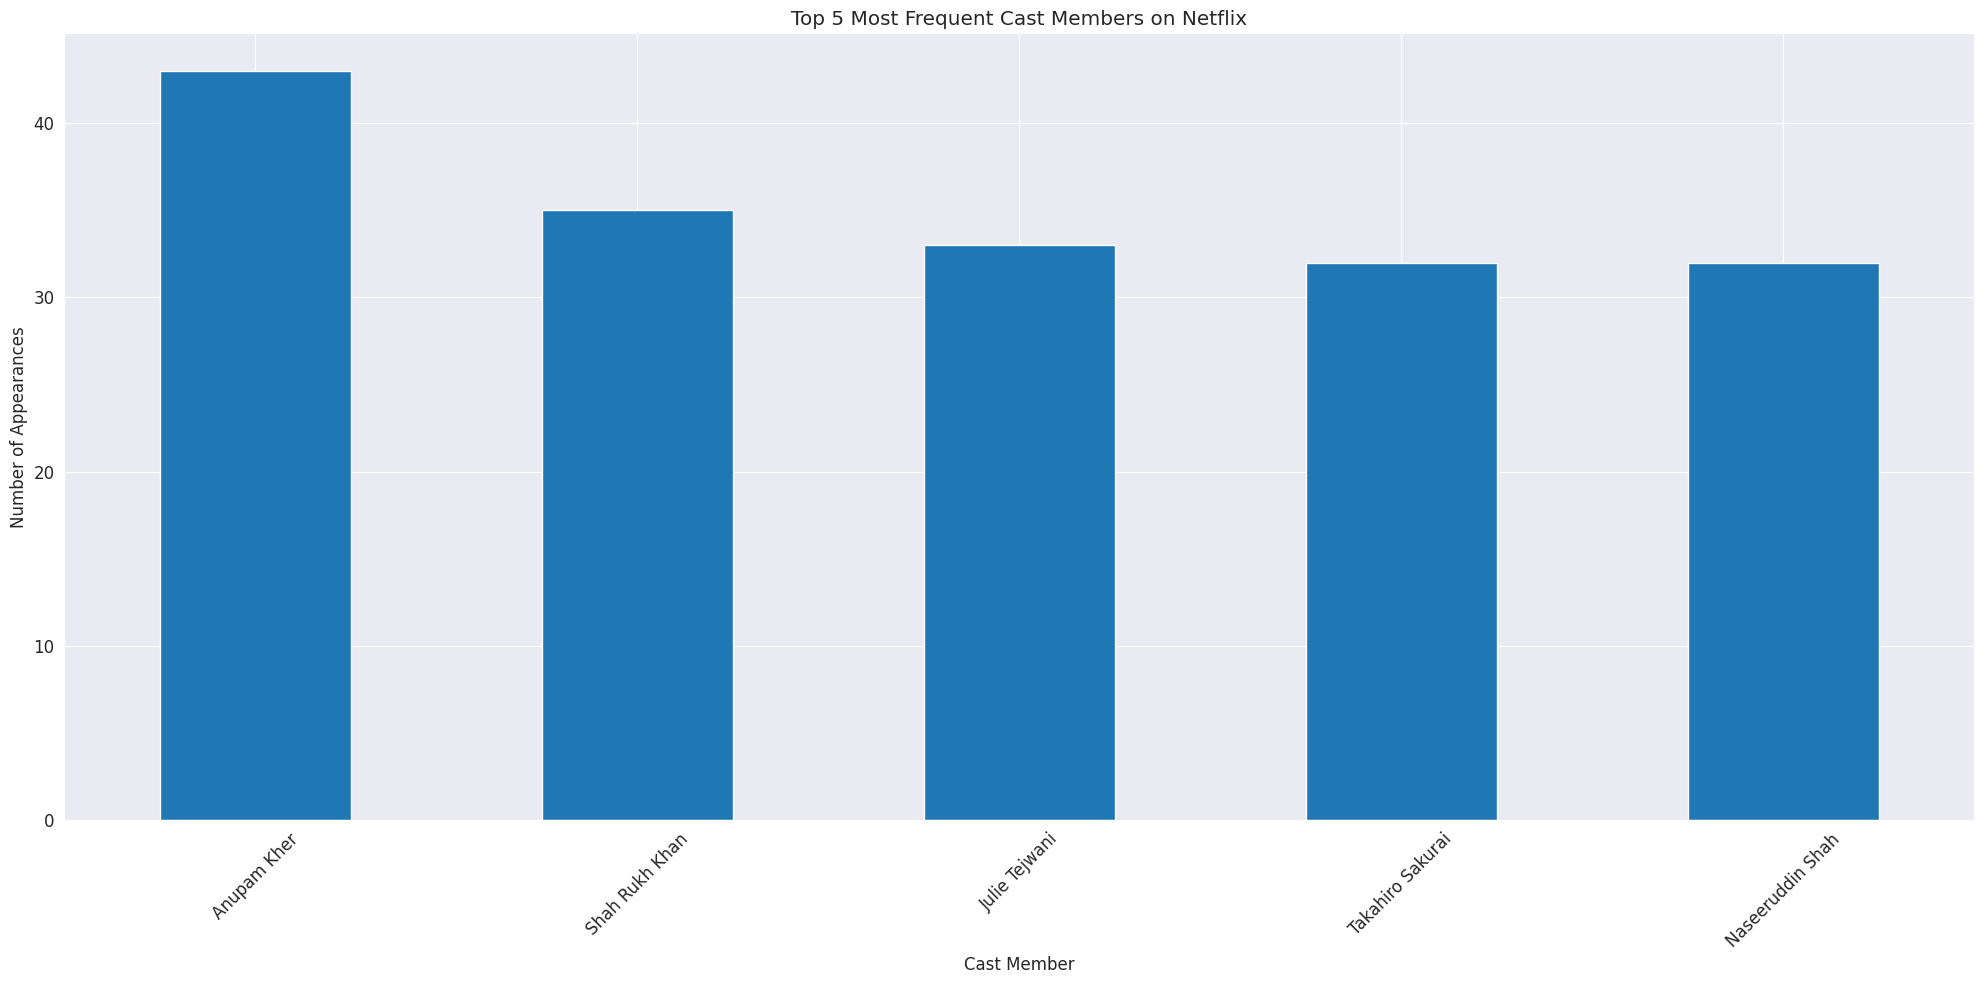

In [147]:
# Drop rows with null values
netflix_df = netflix_df.dropna(subset=['cast'])

# Split cast names and explode into individual rows
cast_list = netflix_df['cast'].str.split(', ')
cast_exploded = cast_list.explode()

# Split cast names and explode into individual rows
top_cast = cast_exploded.value_counts().head(5)

# Plot the Bar Chart
plt.figure(figsize=(20,10))
top_cast.plot(kind='bar', color='#1f77b4')
plt.title('Top 5 Most Frequent Cast Members on Netflix')
plt.xlabel('Cast Member')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Conclusion

"And that’s a wrap on this project! What an incredible experience it’s been—super engaging and packed with learning. I gained a lot of insights just by diving deep into the data and building it all out.

This project took a thorough look at Netflix’s movie and TV show catalog, and I visualized everything—from straightforward bar charts to intricate heatmaps. It really opened my eyes to how powerful this dataset can be. Imagine using it to figure out the perfect release time for a movie, how long a series should run before viewers lose interest, or which genres consistently draw the most attention. This EDA journey explored all of that, and I tried to bring those possibilities to life through the visuals I created."